In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, jaccard_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
df = pd.read_csv('../one_hand_dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.199214,0.830371,1.001268e-07,0.228846,0.817112,-0.001888,0.251727,0.777591,-0.009224,0.272395,...,0.226277,0.777359,-0.049979,0.222359,0.803313,-0.046191,0.210376,0.799232,-0.040996,C - c
1,0.650582,0.463097,-5.370000e-08,0.653664,0.426893,0.017183,0.663378,0.394169,0.021824,0.678477,...,0.707209,0.368933,-0.008228,0.704487,0.390963,-0.003960,0.695334,0.399706,-0.001348,C - c
2,0.200531,0.685270,3.237020e-07,0.258192,0.665581,-0.023378,0.320593,0.608031,-0.046808,0.374448,...,0.213494,0.429912,-0.099338,0.225102,0.495491,-0.088479,0.209420,0.515957,-0.075170,C - c
3,0.605458,0.464886,1.527884e-07,0.628675,0.457653,0.001207,0.649279,0.424777,-0.003253,0.666094,...,0.641601,0.383050,-0.027402,0.636386,0.406496,-0.022661,0.624341,0.408692,-0.017409,C - c
4,0.525861,0.423194,9.633758e-08,0.550582,0.418285,0.000873,0.572819,0.382919,-0.004033,0.591932,...,0.557949,0.326943,-0.031692,0.553027,0.358206,-0.025774,0.540709,0.361923,-0.018976,C - c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,0.181887,0.586748,1.596535e-07,0.171896,0.538364,0.005047,0.168812,0.485661,0.004392,0.164317,...,0.240461,0.464758,-0.036724,0.254535,0.441493,-0.040037,0.266412,0.420647,-0.041924,Five - 5
10799,0.608757,0.836990,7.076974e-08,0.583156,0.794954,-0.005262,0.575992,0.737085,-0.008804,0.573581,...,0.673729,0.714822,-0.019411,0.684061,0.690052,-0.022602,0.692665,0.667309,-0.024577,Five - 5
10800,0.410178,0.499018,1.610652e-07,0.381364,0.465576,-0.004658,0.367650,0.412745,-0.009083,0.359152,...,0.472964,0.358319,-0.028358,0.483547,0.330732,-0.029995,0.492187,0.306550,-0.030531,Five - 5
10801,0.797608,0.913195,5.385390e-07,0.731960,0.818082,-0.021907,0.703267,0.693303,-0.041264,0.686169,...,0.946365,0.592076,-0.062567,0.961809,0.524113,-0.061895,0.969885,0.469927,-0.059226,Five - 5


In [4]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.199214,0.830371,1.001268e-07,0.228846,0.817112,-0.001888,0.251727,0.777591,-0.009224,0.272395,...,0.226277,0.777359,-0.049979,0.222359,0.803313,-0.046191,0.210376,0.799232,-0.040996,C - c
1,0.650582,0.463097,-5.370000e-08,0.653664,0.426893,0.017183,0.663378,0.394169,0.021824,0.678477,...,0.707209,0.368933,-0.008228,0.704487,0.390963,-0.003960,0.695334,0.399706,-0.001348,C - c
2,0.200531,0.685270,3.237020e-07,0.258192,0.665581,-0.023378,0.320593,0.608031,-0.046808,0.374448,...,0.213494,0.429912,-0.099338,0.225102,0.495491,-0.088479,0.209420,0.515957,-0.075170,C - c
3,0.605458,0.464886,1.527884e-07,0.628675,0.457653,0.001207,0.649279,0.424777,-0.003253,0.666094,...,0.641601,0.383050,-0.027402,0.636386,0.406496,-0.022661,0.624341,0.408692,-0.017409,C - c
4,0.525861,0.423194,9.633758e-08,0.550582,0.418285,0.000873,0.572819,0.382919,-0.004033,0.591932,...,0.557949,0.326943,-0.031692,0.553027,0.358206,-0.025774,0.540709,0.361923,-0.018976,C - c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,0.181887,0.586748,1.596535e-07,0.171896,0.538364,0.005047,0.168812,0.485661,0.004392,0.164317,...,0.240461,0.464758,-0.036724,0.254535,0.441493,-0.040037,0.266412,0.420647,-0.041924,Five - 5
10799,0.608757,0.836990,7.076974e-08,0.583156,0.794954,-0.005262,0.575992,0.737085,-0.008804,0.573581,...,0.673729,0.714822,-0.019411,0.684061,0.690052,-0.022602,0.692665,0.667309,-0.024577,Five - 5
10800,0.410178,0.499018,1.610652e-07,0.381364,0.465576,-0.004658,0.367650,0.412745,-0.009083,0.359152,...,0.472964,0.358319,-0.028358,0.483547,0.330732,-0.029995,0.492187,0.306550,-0.030531,Five - 5
10801,0.797608,0.913195,5.385390e-07,0.731960,0.818082,-0.021907,0.703267,0.693303,-0.041264,0.686169,...,0.946365,0.592076,-0.062567,0.961809,0.524113,-0.061895,0.969885,0.469927,-0.059226,Five - 5


In [5]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (10803, 63)
Labels shape = (10803,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
# }

# grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

# print("Performing grid search...")
# grid_search.fit(x_train, y_train)
# print("Grid search complete.")

# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# best_svm_model = grid_search.best_estimator_

In [8]:
svm = SVC(C=100, gamma=1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=100, gamma=1)

In [9]:
y_pred = svm.predict(x_test)
y_pred

array(['Three - 3', 'Nine - 9', 'One - 1', ..., 'Nine - 9', 'One - 1',
       'Four - 4'], dtype=object)

In [10]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)
iou = jaccard_score(y_test, y_pred, average='micro')

print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("IoU:", iou)

F1 Score: 0.998149005090236
Recall: 0.998149005090236
Precision: 0.998149005090236
Accuracy: 0.998149005090236
IoU: 0.9963048498845266


<Axes: title={'center': 'Confusion Matrix for One Hand Dataset'}>

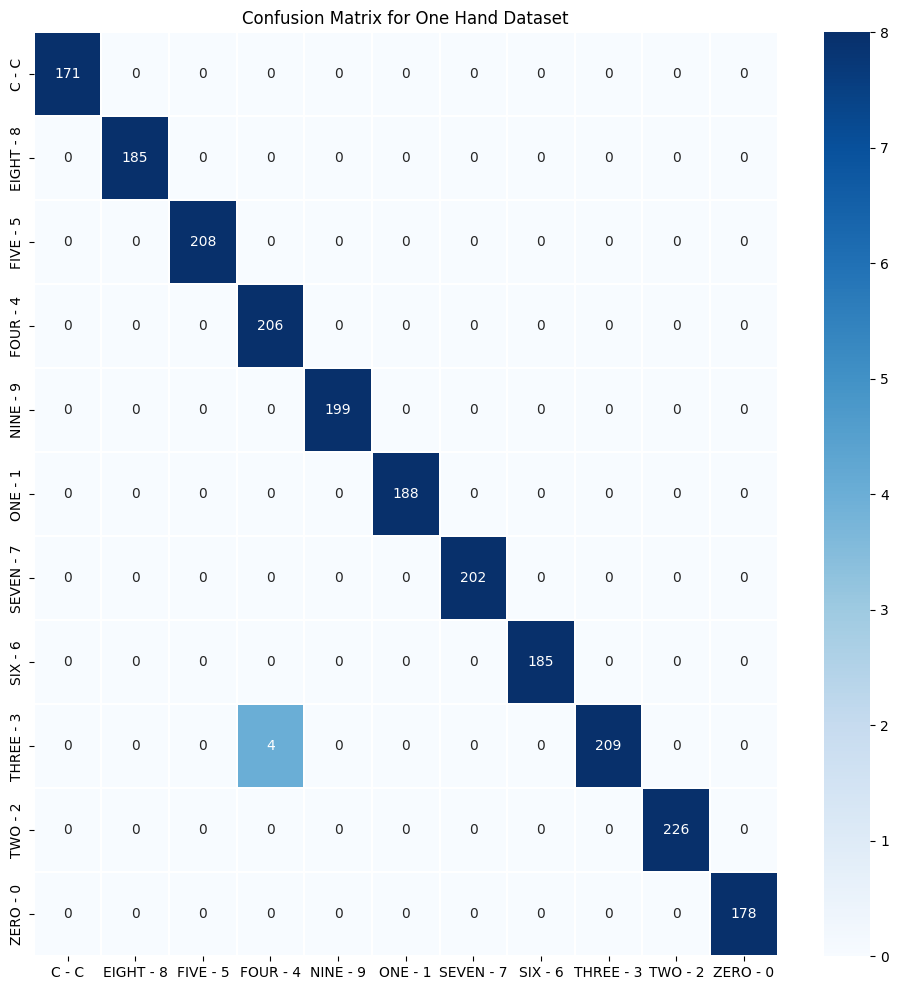

In [11]:
labels = sorted(list(set(df['Output'])))
labels = [str(x).upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix for One Hand Dataset")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [12]:
save_path = '../one_hand_model.pkl'

with open(save_path, 'wb') as f:
    pickle.dump(svm, f)